# Portfolio -3

### Analysis of CMU Book summary dataset.

***Student ID → 46277404***

***Student name → Mohammed Rizwan Amanullah***

***Github repository link →*** [https://github.com/MQCOMP6200/portfolio-s1-2021-mohrizwan1993](https://github.com/MQCOMP6200/portfolio-s1-2021-mohrizwan1993)

### Introduction

Aim of this portfolio is to predict the genre of the book based on the book summary. The data files are available in the folder **/data/portfolio_1/booksummaries.txt**. 

At first, I performed **data cleaning**(removing empty spaces, remove backslash and apostrophe) and then **removed the stop words(common words like a, an, the, etc.)**. After that, performed **Lemmatization** to group the different version of the same word into one single word. 

Once data cleaning was performed, I did data data mapping for genre column. This portfolio involves feature extraction and performing five machine learning models. The model with the higest accuracy score is used to perform model inference. Below mentioned models are built as part of this portfolio

- Logistic Regression
- SVM(Linear)
- SVM(kernal)
- Gaussian Naive Bayes
- Multinomial Naive Bayes


## Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
import warnings
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

warnings.simplefilter('ignore')

In [2]:
# loading the dataset
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("data/portfolio_3/booksummaries.txt", sep="\t", header=None, names=names, keep_default_na=False)


In [3]:
target_genres = ["Children's literature",
                 'Science Fiction',
                 'Novel',
                 'Fantasy',
                 'Mystery']

# create a Series of empty strings the same length as the list of books
genre = pd.Series(np.repeat("", books.shape[0]))
# look for each target genre and set the corresponding entries in the genre series to the genre label
for g in target_genres:
    genre[books['genres'].str.contains(g)] = g

# add this to the book dataframe and then select only those rows that have a genre label
# drop some useless columns
books['genre'] = genre
genre_books = books[genre!=''].drop(['genres', 'fid', 'wid'], axis=1)

genre_books.shape


(8954, 5)

In [4]:
# check how many books we have in each genre category
genre_books.groupby('genre').count()


,title,author,date,summary
genre,,,,
Children's literature,1092,1092,1092,1092
Fantasy,2311,2311,2311,2311
Mystery,1396,1396,1396,1396
Novel,2258,2258,2258,2258
Science Fiction,1897,1897,1897,1897


In [5]:
#lets look at the first five rows of the dataset
genre_books.head(5)

,title,author,date,summary,genre
0,Animal Farm,George Orwell,1945-08-17,"Old Major, the old boar on the Manor Farm, ca...",Children's literature
1,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...",Novel
2,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,Novel
4,A Fire Upon the Deep,Vernor Vinge,,The novel posits that space around the Milky ...,Fantasy
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...",Fantasy


In [6]:
#there are no null values in the dataset.
genre_books.isnull().sum()

title      0
author     0
date       0
summary    0
genre      0
dtype: int64

## Data cleaning

***As a part of data preprocessing, I'll be performing*** 

- remove backslash- apostrophe
- remove everything except alphabets
- remove whitespaces
- convert text to lowercase
- remove stopwords
- Lemmatization of words

In [7]:
#removing text that are not of interest to our analysis
def clean(summary):
    summary = re.sub("\'", "", summary) # remove backslash-apostrophe 
    summary = re.sub("[^a-zA-Z]"," ", summary)  # remove everything except alphabets
    summary = ' '.join(summary.split())  # remove whitespaces 
    summary = summary.lower() # convert text to lowercase 
    return summary

genre_books.loc[:,'summary']=genre_books.loc[:,'summary'].apply(lambda x: clean(x))

In [8]:
# summary after cleaning.
genre_books['summary'].head(10)

0     old major the old boar on the manor farm calls...
1     alex a teenager living in near future england ...
2     the text of the plague is divided into five pa...
4     the novel posits that space around the milky w...
6     ged is a young boy on gont one of the larger i...
8     living on mars deckard is acting as a consulta...
9     beginning several months after the events in b...
20    the story is told through the eyes of narrator...
21    nine years after emperor paul muaddib walked i...
23    the situation is desperate for the bene gesser...
Name: summary, dtype: object

In [9]:
top_words = genre_books['summary']

In [10]:
# making use of CountVectorizer to count the frequency of words
vec = CountVectorizer()
vec.fit(top_words)

CountVectorizer()

In [11]:
# transforming to matrix format
vec_mat = vec.transform(top_words)

In [12]:
#get the top fifty words
df = pd.DataFrame(vec_mat.toarray(), columns= vec.get_feature_names())
df_top50 = df.sum().sort_values(ascending=False)[:50]

Text(0.5, 1.0, 'Top 50 words before data processing')

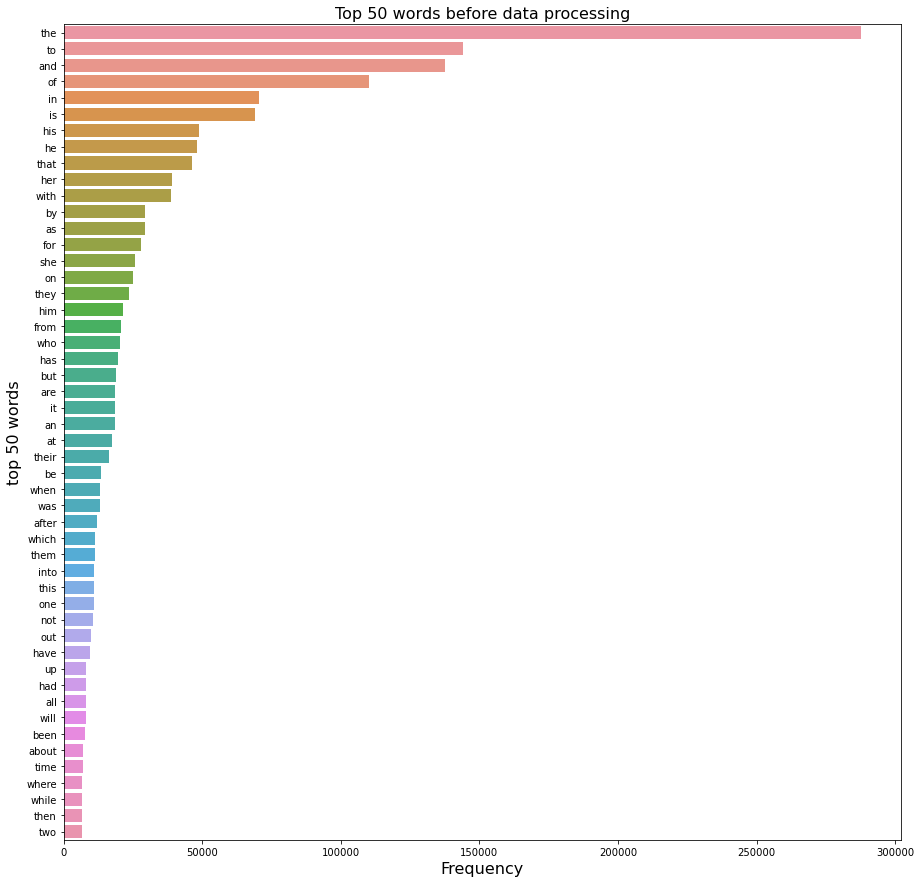

In [13]:
#plotting the top fifty words
plt.figure(figsize=(15,15)) 
sns.barplot(df_top50.values, df_top50.index)
plt.ylabel("top 50 words", fontsize=16)
plt.xlabel("Frequency", fontsize=16)
plt.title("Top 50 words before data processing", fontsize=16)

### Remove Stopwords
Removing the very common **stop words** like **a, and, the**, etc. from the summary column. As it is not useful for classification.

In [14]:
#removing the stop words from the summary column
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

genre_books['summary'] = genre_books['summary'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammedrizwan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#summay after removing stop words
genre_books['summary']

0        old major old boar manor farm calls animals fa...
1        alex teenager living near future england leads...
2        text plague divided five parts town oran thous...
4        novel posits space around milky way divided co...
6        ged young boy gont one larger islands north ar...
                               ...                        
16525    beautiful creatures set fictional gatlin south...
16526    returning home strange things starting occur s...
16531                                             receptio
16532    novel split seven parts first depicting afterm...
16549    story starts former government agent frank com...
Name: summary, Length: 8954, dtype: object

## Lemmatization on summary
Lemmatisation is a process of grouping words so that they can be analysed as single term. For example. the words like do/did/does will be grouped into one.

In [16]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


genre_books['summary'] = genre_books['summary'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammedrizwan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
#summary after lemmatization
genre_books['summary']

0        old major old boar manor farm call animal farm...
1        alex teenager living near future england lead ...
2        text plague divided five part town oran thousa...
4        novel posit space around milky way divided con...
6        ged young boy gont one larger island north arc...
                               ...                        
16525    beautiful creature set fictional gatlin south ...
16526    returning home strange thing starting occur sm...
16531                                             receptio
16532    novel split seven part first depicting afterma...
16549    story start former government agent frank comp...
Name: summary, Length: 8954, dtype: object

In [18]:
# getting the top 50 words after all data cleaning operations
top_clean_words = genre_books['summary']
vec.fit(top_clean_words)
vec_mat1 = vec.transform(top_clean_words)

In [19]:
df_clean = pd.DataFrame(vec_mat1.toarray(), columns= vec.get_feature_names())
df_clean_top50 = df_clean.sum().sort_values(ascending=False)[:50]

Text(0.5, 1.0, 'Top 50 words after data processing')

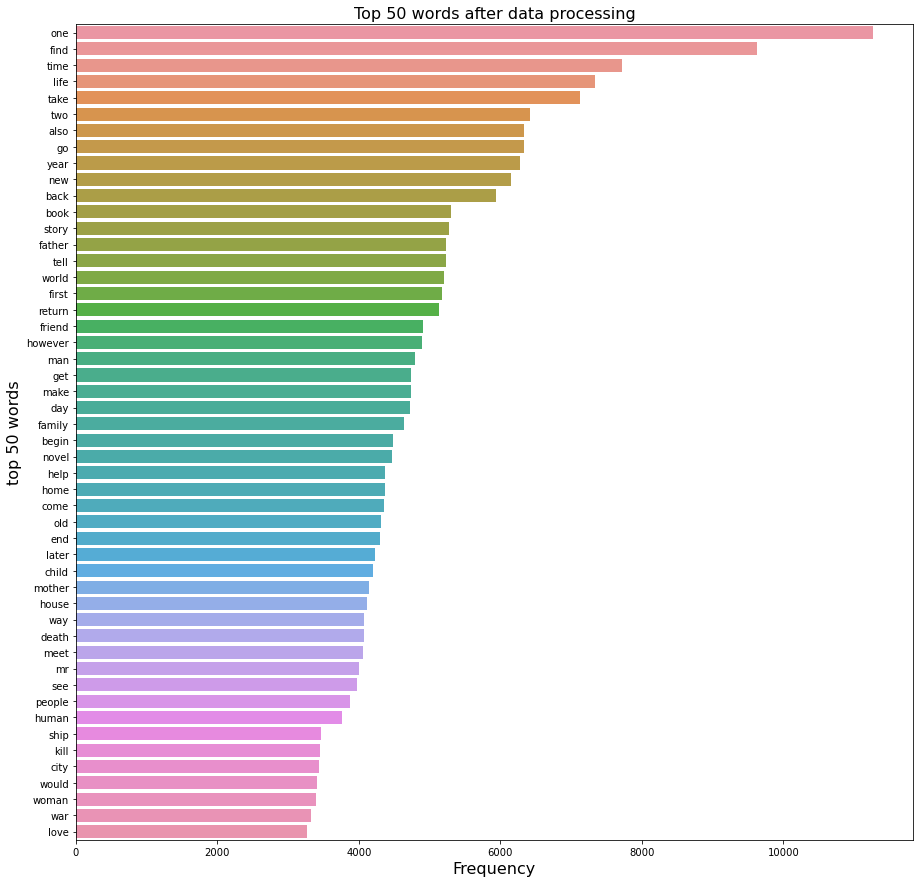

In [20]:
# plot to show the top fifty words after cleaning
plt.figure(figsize=(15,15)) 
sns.barplot(df_clean_top50.values, df_clean_top50.index)
plt.ylabel("top 50 words", fontsize=16)
plt.xlabel("Frequency", fontsize=16)
plt.title("Top 50 words after data processing", fontsize=16)

In [21]:
genre_books['genre'].value_counts()

Fantasy                  2311
Novel                    2258
Science Fiction          1897
Mystery                  1396
Children's literature    1092
Name: genre, dtype: int64

## Data mapping

Data mapping is done to map each values in series with another value. Here, we are performing mapping on genre column.

In [22]:
# mapping genre column
genre_books['genre'] = genre_books.genre.map({'Fantasy':0, 'Novel':1, 'Science Fiction':2, 'Mystery':3, "Children's literature":4})

In [23]:
genre_books['genre'].value_counts()

0    2311
1    2258
2    1897
3    1396
4    1092
Name: genre, dtype: int64

In [24]:
X = genre_books['summary']
y = genre_books['genre'].astype(int)

### TfidVectorizer
TfidVectorizer is an algorith which is used to transform the text in a document to a meaningful representation of numbers. We can use that to perform prediction.

In [25]:
tfid_vec = TfidfVectorizer(max_features=20000)
X_tfid = tfid_vec.fit_transform(X)

In [26]:
#splitting the data into test and train. 80% for training and 20 percent for testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X_tfid, y, test_size=0.2, random_state=557)

In [27]:
print("X train shape", Xtrain.shape)
print("X test shape", Xtest.shape)
print("y train shape", ytrain.shape)
print("y test shape", ytest.shape)

X train shape (7163, 20000)
X test shape (1791, 20000)
y train shape (7163,)
y test shape (1791,)


# Machine learning models

We will be building five machine learning models to predict the genre based on summary column. The one with the higest accuracy score will be used to perform model inference

## Logistic Regression

In [28]:
start_time = time.time()
lr=LogisticRegression()
lr.fit(Xtrain, ytrain)
end_time = time.time()
lr_time = end_time - start_time
print(f"Logistic regression time is {lr_time}")

Logistic regression time is 6.959456920623779


In [29]:
#Accuracy on test data
ypred = lr.predict(Xtest)
lr_accuracy_test = accuracy_score(ytest, ypred)
print(f"Accuracy score on test data is {lr_accuracy_test}")
print("Report...")
print(classification_report(ytest, ypred))

Accuracy score on test data is 0.7107761027359017
Report...
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       459
           1       0.62      0.79      0.69       445
           2       0.75      0.73      0.74       376
           3       0.82      0.68      0.74       272
           4       0.74      0.46      0.57       239

    accuracy                           0.71      1791
   macro avg       0.73      0.69      0.70      1791
weighted avg       0.72      0.71      0.71      1791



In [30]:
#Accuracy on train data
ypred = lr.predict(Xtrain)
lr_accuracy_train = accuracy_score(ytrain, ypred)
print(f"Accuracy score on train data is {lr_accuracy_train}")
print("Report...")
print(classification_report(ytrain, ypred))

Accuracy score on train data is 0.8856624319419237
Report...
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1852
           1       0.84      0.92      0.88      1813
           2       0.88      0.91      0.89      1521
           3       0.94      0.85      0.89      1124
           4       0.93      0.78      0.85       853

    accuracy                           0.89      7163
   macro avg       0.90      0.87      0.88      7163
weighted avg       0.89      0.89      0.89      7163



## SVM(Linear)

In [31]:
start_time = time.time()
sv=svm.SVC(kernel='linear').fit(Xtrain, ytrain)
end_time = time.time()
svm_time = end_time - start_time
print(f"SVM linear time is {svm_time}")

SVM linear time is 89.08458495140076


In [32]:
#Accuracy on test data
ypred = sv.predict(Xtest)
sv_linear_accuracy_test = accuracy_score(ytest, ypred)
print(f"Accuracy score on test data is {sv_linear_accuracy_test}")
print("Report...")
print(classification_report(ytest, ypred))

Accuracy score on test data is 0.7152428810720268
Report...
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       459
           1       0.63      0.78      0.69       445
           2       0.74      0.76      0.75       376
           3       0.82      0.67      0.74       272
           4       0.68      0.53      0.60       239

    accuracy                           0.72      1791
   macro avg       0.73      0.70      0.71      1791
weighted avg       0.72      0.72      0.71      1791



In [33]:
#Accuracy on train data
ypred = sv.predict(Xtrain)
sv_linear_accuracy_train = accuracy_score(ytrain, ypred)
print(f"Accuracy score on train data is {sv_linear_accuracy_train}")
print("Report...")
print(classification_report(ytrain, ypred))

Accuracy score on train data is 0.9396900739913444
Report...
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1852
           1       0.92      0.94      0.93      1813
           2       0.91      0.96      0.94      1521
           3       0.97      0.92      0.95      1124
           4       0.96      0.91      0.94       853

    accuracy                           0.94      7163
   macro avg       0.94      0.94      0.94      7163
weighted avg       0.94      0.94      0.94      7163



## SVM Kernal

In [34]:
start_time = time.time()
sv_rbf=svm.SVC(kernel='rbf',gamma=1).fit(Xtrain, ytrain)
end_time = time.time()
svm_time = end_time - start_time
print(f"SVM rbf time is {svm_time}")

SVM rbf time is 116.97084188461304


In [35]:
#Accuracy on test data
ypred = sv_rbf.predict(Xtest)
sv_rbf_accuracy_test = accuracy_score(ytest, ypred)
print(f"Accuracy score on test data is {sv_rbf_accuracy_test}")
print("Report...")
print(classification_report(ytest, ypred))

Accuracy score on test data is 0.7051926298157454
Report...
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       459
           1       0.58      0.82      0.68       445
           2       0.75      0.76      0.75       376
           3       0.86      0.62      0.72       272
           4       0.76      0.42      0.54       239

    accuracy                           0.71      1791
   macro avg       0.74      0.67      0.69      1791
weighted avg       0.73      0.71      0.70      1791



In [36]:
#Accuracy on train data
ypred = sv_rbf.predict(Xtrain)
sv_rbf_accuracy_train = accuracy_score(ytrain, ypred)
print(f"Accuracy score on train data is {sv_rbf_accuracy_train}")
print("Report...")
print(classification_report(ytrain, ypred))

Accuracy score on train data is 0.9801759039508586
Report...
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1852
           1       0.98      0.98      0.98      1813
           2       0.96      0.99      0.97      1521
           3       0.99      0.98      0.99      1124
           4       1.00      0.96      0.98       853

    accuracy                           0.98      7163
   macro avg       0.98      0.98      0.98      7163
weighted avg       0.98      0.98      0.98      7163



## Gaussian Naive Bayes

In [37]:
start_time = time.time()
gnb= GaussianNB()
gnb.fit(Xtrain.toarray(), ytrain)
end_time = time.time()
gnb_time = end_time - start_time
print(f"Gaussian naive bayes time is {gnb_time}")

Gaussian naive bayes time is 9.047112226486206


In [38]:
# Accuracy on test data
ypred = gnb.predict(Xtest.toarray())
gnb_accuracy_test = accuracy_score(ytest, ypred)
print(f"Accuracy score on test data is {gnb_accuracy_test}")
print("Report...")
print(classification_report(ytest, ypred))

Accuracy score on test data is 0.5002791736460078
Report...
              precision    recall  f1-score   support

           0       0.57      0.68      0.62       459
           1       0.44      0.53      0.48       445
           2       0.55      0.50      0.53       376
           3       0.46      0.40      0.43       272
           4       0.42      0.22      0.29       239

    accuracy                           0.50      1791
   macro avg       0.49      0.47      0.47      1791
weighted avg       0.50      0.50      0.49      1791



In [39]:
#Accuracy on train data
ypred = gnb.predict(Xtrain.toarray())
gnb_accuracy_train = accuracy_score(ytrain, ypred)
print(f"Accuracy score on train data is {gnb_accuracy_train}")
print("Report...")
print(classification_report(ytrain, ypred))

Accuracy score on train data is 0.9420633812648331
Report...
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1852
           1       0.99      0.92      0.95      1813
           2       0.94      0.96      0.95      1521
           3       0.89      0.97      0.93      1124
           4       0.83      1.00      0.91       853

    accuracy                           0.94      7163
   macro avg       0.93      0.95      0.94      7163
weighted avg       0.95      0.94      0.94      7163



## Multinomial Naive Bayes

In [40]:
start_time = time.time()
mnb=MultinomialNB(alpha=0.07)
mnb.fit(Xtrain.toarray(), ytrain)
end_time = time.time()
gnb_time = end_time - start_time
print(f"Multinomial naive bayes time is {gnb_time}")

Multinomial naive bayes time is 0.961712121963501


In [41]:
# Accuracy on test data
ypred = mnb.predict(Xtest.toarray())
mnb_accuracy_test = accuracy_score(ytest, ypred)
print(f"Accuracy score on test data is {mnb_accuracy_test}")
print("Report...")
print(classification_report(ytest, ypred))

Accuracy score on test data is 0.6901172529313233
Report...
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       459
           1       0.60      0.72      0.65       445
           2       0.72      0.76      0.73       376
           3       0.72      0.67      0.69       272
           4       0.64      0.47      0.54       239

    accuracy                           0.69      1791
   macro avg       0.69      0.67      0.68      1791
weighted avg       0.69      0.69      0.69      1791



In [42]:
#Accuracy on train data
ypred = mnb.predict(Xtrain.toarray())
mnb_accuracy_train = accuracy_score(ytrain, ypred)
print(f"Accuracy score on train data is {mnb_accuracy_train}")
print("Report...")
print(classification_report(ytrain, ypred))

Accuracy score on train data is 0.9128856624319419
Report...
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1852
           1       0.90      0.92      0.91      1813
           2       0.86      0.93      0.90      1521
           3       0.95      0.93      0.94      1124
           4       0.94      0.89      0.91       853

    accuracy                           0.91      7163
   macro avg       0.92      0.91      0.91      7163
weighted avg       0.91      0.91      0.91      7163



In [43]:
# creating a list having accuracy details of performed models. 
model = ['logistic', 'SVM linear(71.52)', 'SVM rbf', 'Gaussian Naive', 'Multinomial Naive']
acc = [lr_accuracy_test, sv_linear_accuracy_test, sv_rbf_accuracy_test, gnb_accuracy_test, mnb_accuracy_test]
length = len(acc)
for i in range(length):
    acc[i] = round(acc[i]*100, 2)
acc

[71.08, 71.52, 70.52, 50.03, 69.01]

Text(0.5, 1.0, 'Model with high accuracy')

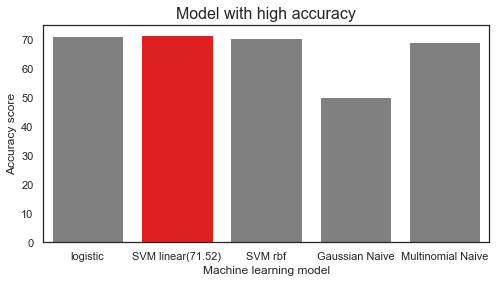

In [44]:
# plotting to show which model has the higest accuracy
plt.figure(figsize=(8,4))
sns.set_theme(style="white")
clr = ['grey' if (acc[i] < max(acc)) else 'red' for i in range(length) ]
graph = sns.barplot(x=model, y=acc, palette=clr)
plt.ylabel("Accuracy score", fontsize=12)
plt.xlabel("Machine learning model", fontsize=12)
plt.title("Model with high accuracy", fontsize=16)

# Model Inference

As we got to know that the SVM linear model has the higest accuracy out of all models. lets use that model to perform model inference. 

In [45]:
# original genre of the text is Children's literature and Science fiction, Mystery and science fiction
# we will be predicting the genre of the below text using svc linear model
test = ['Mr Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large moustache. Mrs Dursley was thin and blonde and had nearly',
        'Ged is a young boy on Gont, one of the',
        'Alex, a teenager living in near-future Englan',
        'Harriet Vane returns reluctantly to Oxford',
        'Nine years after Emperor Paul Muaddib walked into the desert, blind, the ecological transformation of Dune has reached the',
       ]
test_vec = tfid_vec.transform(test)

In [46]:
ypred = sv.predict(test_vec)

In [47]:
actual_genre = ['Mystery', 'Childrens literature', 'Science fiction', 'Mystery', 'Science fiction', 'Mystery']
predicted_genre = {0:'Fantacy',
               1:'Novel',
               2:'Science Fiction',
               3: 'Mystery',
               4:'Childrens literature'
               }

In [48]:
a=0
for i in ypred:
    print(f"Given text is :- '{test[a]}' ")
    print(f"actual genre is {actual_genre[a]}")
    print(f"predicted genre is {predicted_genre[i]}")
    a +=1
    print("-------------------------------")

Given text is :- 'Mr Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large moustache. Mrs Dursley was thin and blonde and had nearly' 
actual genre is Mystery
predicted genre is Mystery
-------------------------------
Given text is :- 'Ged is a young boy on Gont, one of the' 
actual genre is Childrens literature
predicted genre is Childrens literature
-------------------------------
Given text is :- 'Alex, a teenager living in near-future Englan' 
actual genre is Science fiction
predicted genre is Science Fiction
-------------------------------
Given text is :- 'Harriet Vane returns reluctantly to Oxford' 
actual genre is Mystery
predicted genre is Novel
-------------------------------
Given text is :- 'Nine years after Emperor Paul Muaddib walked into the desert, blind, the ecological transformation of Dune has reached the' 
actual genre is Science fiction
predicted genre is Science Ficti

# Conclusion

In this portfolio, we did data cleaning to remove words that are not required for analysis and removed words that would have affected the accuracy of the machine learning model prediction. After building **five models**, we found **SVC linear model** provided high accuracy score(**71.52**) among the considered models. 

We can further improve the model accuracy by processing the summary column. For example, we can do stemming, which is a process of producing morphological variants of root/base words.